## Calculating the period of the sunspot cycle

The code is used to plot monthly mean sunspot numbers and determine the solar cycle. The Fast Fourier Transform (FFT) algorithm  is used to compute the Discrete Fourier Transform and to analyse the variations in sunspot activity over the last 350 years. You can download the monthly mean total sunspot number as csv-file from WDC-SILSO, Royal Observatory of Belgium, Brussels (http://sidc.be/silso/home).
A general introduction to Fourier Transforms and a tutorial in Python is on the Real Python website (https://realpython.com/python-scipy-fft/).
Jake VanderPlas explained in his blog how the FFT algorithm works (http://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft
import numpy as np
# read the data and assign column names
df = pd.read_csv('SN_y_tot_V2.0.csv', delimiter=';', header=None,
                 names=('year', 'ssn', 'sd', 'n_obs',
                        'def'))

# create numpy arrays of date and sunspot number
d_ssn = df.loc[:, 'ssn']
d_year = df.loc[:, 'year']
d_ssn = d_ssn.to_numpy()
d_year = d_year.to_numpy()

Plot the sunspot numbers

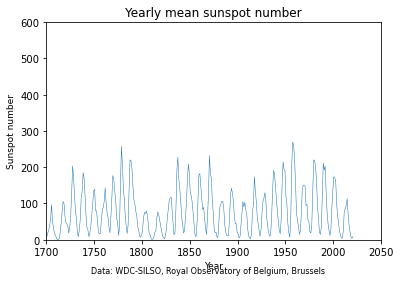

In [2]:
fig = plt.figure()
plt.plot(d_year, d_ssn, linewidth=0.5)
plt.axis([1700, 2050, 0, 600])
plt.xlabel('Year', fontsize=9)
plt.ylabel('Sunspot number', fontsize=9)
plt.title('Yearly mean sunspot number')
plt.figtext(0.5, 0.01, 'Data: WDC-SILSO, Royal Observatory of Belgium, Brussels',
            ha='center', fontsize=8)
plt.show()


First entry in array:  (25203.8-0j)
Sum of the data:  25203.800000000003


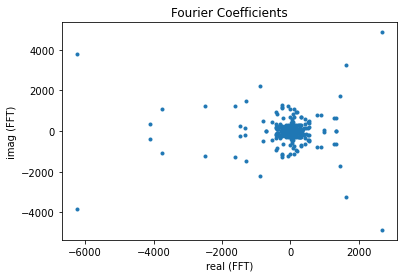

In [3]:
# use Fast Fourier Transform on sunspot numbers
sp_fft = fft(d_ssn)
# the first entry is simply the sum of the data and we delete it
print("First entry in array: ", sp_fft[0])
print("Sum of the data: ", np.sum(d_ssn))
sp_fft = np.delete(sp_fft, 0)
sp_fft[0]
sp_fft_real = sp_fft.real
sp_fft_imag = sp_fft.imag
# plot Fourier coefficients in the Complex Plane
fig = plt.figure()
plt.scatter(sp_fft_real, sp_fft_imag, marker='.')
plt.xlabel('real (FFT)')
plt.ylabel('imag (FFT)')
plt.title('Fourier Coefficients')
plt.show()

Fourier coefficients are difficult to interpret. Squaring the magnitude of
the coefficients is a measure of power. In the FFT array half of the
coefficients are repeated in magnitude, so it is sufficient to calculate the
power of one half.
Plot the power spectrum as a function of frequency, measured in cycles per year.

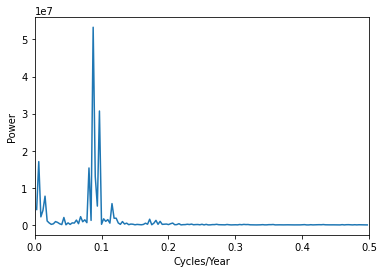

In [4]:
n = len(sp_fft)
power = abs(sp_fft[0:((n + 1) // 2)])**2
nyquist = 0.5
freq = np.array(range(n // 2)) / (n // 2) * nyquist
freq = np.delete(freq, 0)
power = np.delete(power, 0)
fig = plt.figure()
plt.plot(freq, power)
plt.xlim(0, 0.5)
plt.ylabel('Power')
plt.xlabel('Cycles/Year')
plt.show()

The frequency for the maximum sunspot activity is less than one year. Changing
to period instead of cycles is easier to interpret.
The plot indicates a sunspot cycle between 11 and 12 years.

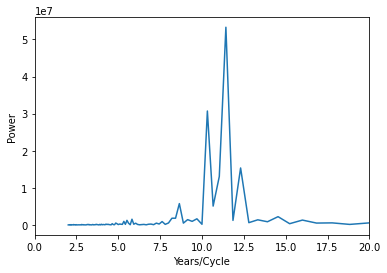

In [5]:
period = 1 / freq
fig = plt.figure()
plt.plot(period, power)
plt.xlim(0, 20)
plt.xlabel('Years/Cycle')
plt.ylabel('Power')
plt.show()

Changing the limit of the plot, we see a cycle of about 11.4 years.

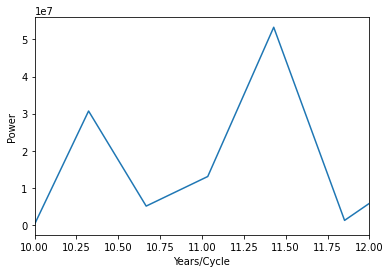

In [6]:
period = 1 / freq
fig = plt.figure()
plt.plot(period, power)
plt.xlim(10, 12)
plt.xlabel('Years/Cycle')
plt.ylabel('Power')
plt.show()